In [ ]:
#Discrete Data having boolean values/ true false

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [ ]:
df=pd.read_csv('HR-Employee-Attrition.csv')

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df['Attrition'] = (df['Attrition'] == 'Yes').astype(int)#the given statement in the RHS converts the attrion columns data into Boolan series and '.astype(int)' converts True to 1 and False to 0
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df[['Attrition']].value_counts()

Attrition
0            1233
1             237
dtype: int64

In [ ]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<ipython-input-14-3cdd7f0173f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

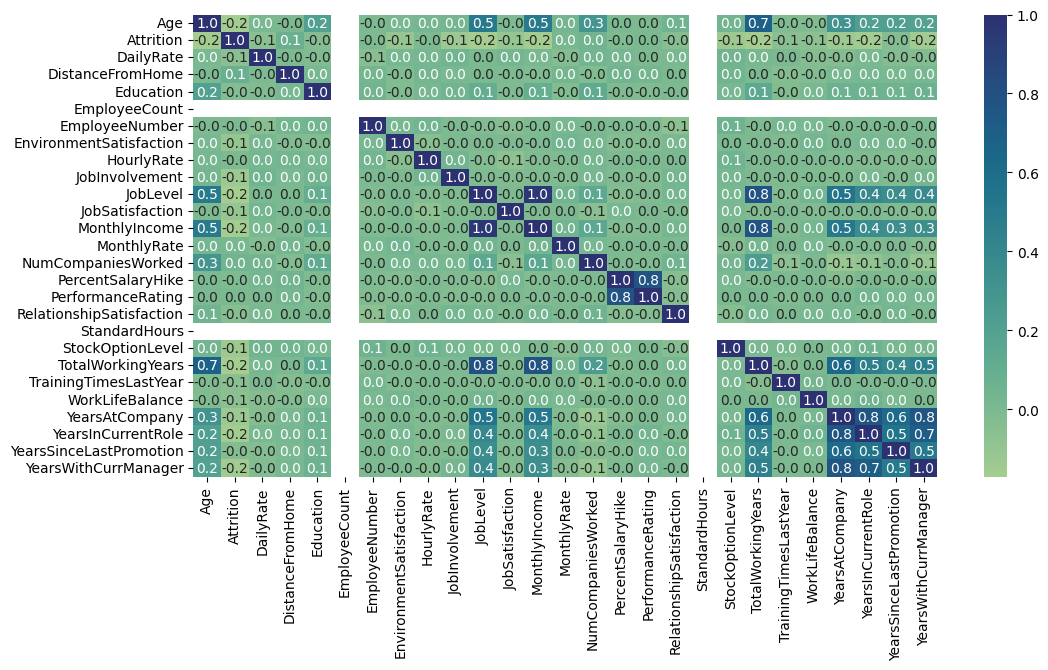

In [ ]:
corr = df.corr()#it creates the correlation matrix and correltates the data of diufferent columns
plt.figure(figsize=(12,6))#creates the area of 12 x 6 for the plot
sns.heatmap(corr , annot = True, fmt='.1f', cmap="crest")#this ensures that the correlation values are displayed within the heatmap cells


In [ ]:
X = df.drop(['Attrition','YearsAtCompany', 'TotalWorkingYears','YearsWithCurrManager'],axis=1)
Y = df.Attrition

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(max_iter=1000,solver="liblinear")
)

In [ ]:
model.fit(X_train,Y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BusinessTravel', 'Department',
                                     'EducationField', 'Gender', 'JobRole',
                                     'MaritalStatus', 'Over18', 'OverTime'])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model.score(X_test,Y_test)

0.8707482993197279

In [ ]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]
features

array(['Age', 'BusinessTravel_1', 'BusinessTravel_2', 'BusinessTravel_3',
       'DailyRate', 'Department_1', 'Department_2', 'Department_3',
       'DistanceFromHome', 'Education', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4',
       'EducationField_5', 'EducationField_6', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_1',
       'Gender_2', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5',
       'JobRole_6', 'JobRole_7', 'JobRole_8', 'JobRole_9',
       'JobSatisfaction', 'MaritalStatus_1', 'MaritalStatus_2',
       'MaritalStatus_3', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18_1', 'OverTime_1', 'OverTime_2',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPr

In [ ]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

OverTime_1                 0.514398
JobInvolvement             0.645160
StockOptionLevel           0.676340
JobSatisfaction            0.713451
EnvironmentSatisfaction    0.721183
dtype: float64

<Axes: >

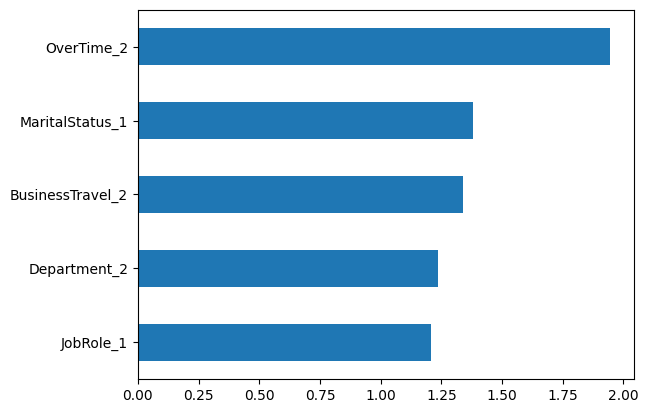

In [ ]:
odds_ratios.tail().plot(kind='barh')

<Axes: >

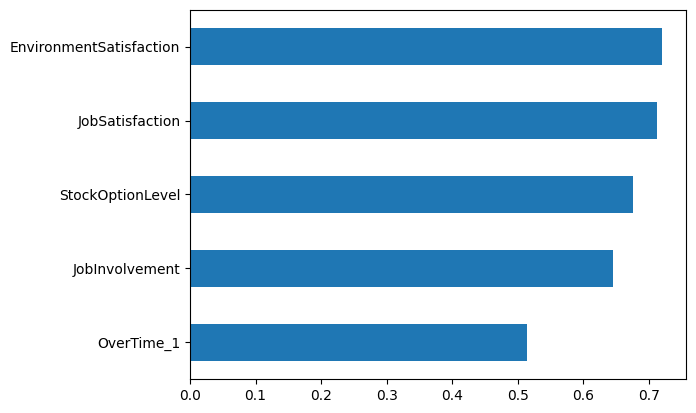

In [ ]:
odds_ratios.head().plot(kind='barh')

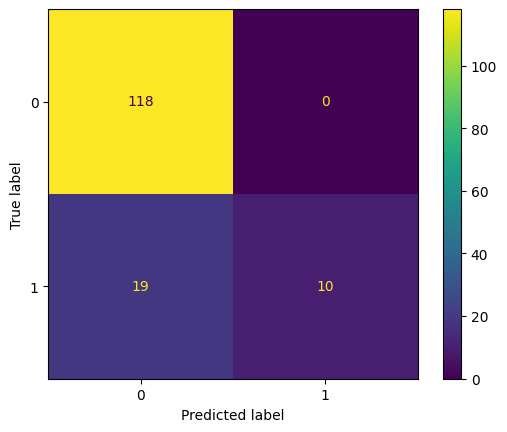

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

In [ ]:
probabilities = model.predict_proba(X_test)[:,1]
default_predictions = (probabilities >= 0.5).astype(int)
default_cm = confusion_matrix(Y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5):")
print(default_cm)

#Adjust threshold to 0.7
adjusted_threshold = 0.7
adjusted_predictions = (probabilities >= adjusted_threshold).astype(int)
adjusted_cm = confusion_matrix(Y_test,adjusted_predictions)
print("\nConfusion Matrix (Adjusted Threshold 0.7):")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5):
[[118   0]
 [ 19  10]]

Confusion Matrix (Adjusted Threshold 0.7):
[[118   0]
 [ 28   1]]
